In [1]:
import dinkum
from dinkum.vfg import Gene, Receptor, Ligand
from dinkum.vfn import Tissue
from dinkum import vfg, vfn, vfg2

from dinkum.display import MultiTissuePanel, tc_record_activity

import pandas as pd
from matplotlib import pyplot as plt


## Activation at multiple different levels

Let's build some input genes with different concentration curves:

initializing: dinkum v0.6.0.dev0
start=1 stop=10


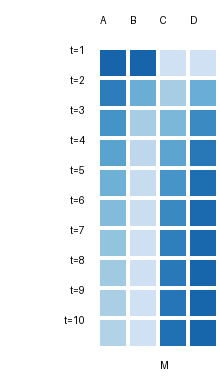

In [2]:
dinkum.reset()

m = Tissue(name='M')
a = Gene(name='A')
b = Gene(name='B')
c = Gene(name='C')
d = Gene(name='D')
    
a.is_present(where=m, start=1, duration=1, level=100)
b.is_present(where=m, start=1, duration=1, level=100)
c.is_present(where=m, start=1, duration=1, level=0)
d.is_present(where=m, start=1, duration=1, level=0)

a.custom2(vfg2.Decay(rate=1.2, initial_level=100, tissue=m, start_time=1))
b.custom2(vfg2.Decay(rate=2, initial_level=100, tissue=m, start_time=1))
c.custom2(vfg2.Growth(rate=0.25, start_time=1, initial_level=0, tissue=m))
d.custom2(vfg2.Growth(rate=0.5, start_time=1, initial_level=0, tissue=m))

gene_names = vfg.get_gene_names()
display_fn, conc_df, active_df = dinkum.run_and_display_df(start=1, stop=10, gene_names=gene_names)
display_fn

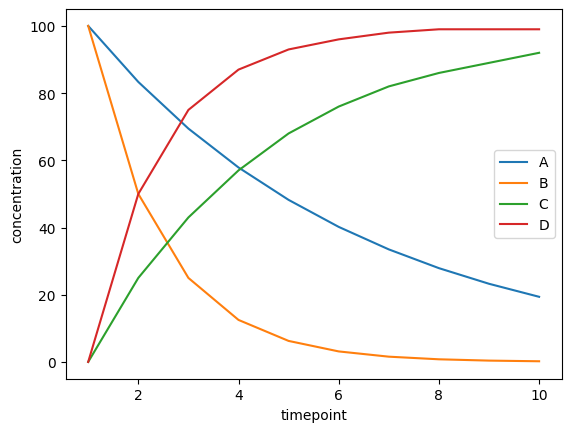

In [3]:
# plot the concentrations on a real plot ;)
conc_df.plot()
plt.ylabel('concentration')
plt.legend()

## Connecting inputs to outputs

![](images/7-multi-level-activation.png)

Let's activate three different genes at three different concentrations.

initializing: dinkum v0.6.0.dev0


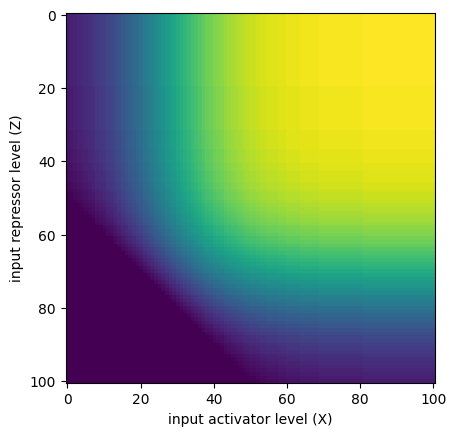

In [4]:
dinkum.reset()

x = Gene(name='X')
z = Gene(name='Z')
o = Gene(name='out')
o2 = Gene(name='out2')

m = Tissue(name='M')
x.is_present(where=m, start=1)

logit = vfg2.LogisticRepressor2(activator_name='X', repressor_name='Z')
o.custom2(logit)

arr = vfg2.calc_response_2d(timepoint=2, target_gene_name='out', x_gene_name='X', y_gene_name='Z')

plt.imshow(arr, cmap='viridis', interpolation='nearest')
plt.xlabel('input activator level (X)')
plt.ylabel('input repressor level (Z)')
plt.show()

initializing: dinkum v0.6.0.dev0
start=1 stop=10


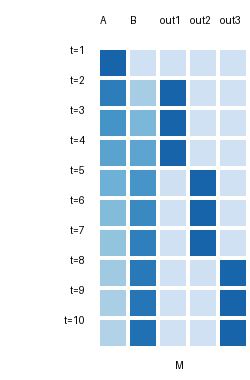

In [5]:
dinkum.reset()

m = Tissue(name='M')
a = Gene(name='A')
b = Gene(name='B')

output1 = Gene(name='out1')
output2 = Gene(name='out2')
output3 = Gene(name='out3')

a.custom2(vfg2.Decay(rate=1.2, tissue=m))
b.custom2(vfg2.Growth(rate=0.25, tissue=m))

output1.custom2(vfg2.LogisticActivator(midpoint=60, rate=100, activator_name='A'))
output2.custom2(vfg2.LogisticRepressor2(activator_name='B', repressor_name='B',
                                        activator_midpoint=50, repressor_midpoint=80,
                                        activator_rate=100, repressor_rate=100))
output3.custom2(vfg2.LogisticActivator(midpoint=80, rate=100, activator_name='B'))

gene_names = vfg.get_gene_names()
display_fn, conc_df, active_df = dinkum.run_and_display_df(start=1, stop=10, gene_names=gene_names)
display_fn

In [6]:
conc_df

,tissue,timepoint_str,A,B,out1,out2,out3
timepoint,,,,,,,
1,M,t=1,100.000000,0,0,0,0
2,M,t=2,83.333333,25,100,0,0
3,M,t=3,69.444444,43,100,0,0
4,M,t=4,57.870370,57,100,0,0
5,M,t=5,48.225309,68,1,100,0
6,M,t=6,40.187757,76,0,100,0
7,M,t=7,33.489798,82,0,100,0
8,M,t=8,27.908165,86,0,1,99
9,M,t=9,23.256804,89,0,0,100


In [7]:
active_df

,tissue,timepoint_str,A,B,out1,out2,out3
timepoint,,,,,,,
1,M,t=1,True,True,True,True,True
2,M,t=2,True,True,True,True,True
3,M,t=3,True,True,True,True,True
4,M,t=4,True,True,True,True,True
5,M,t=5,True,True,True,True,True
6,M,t=6,True,True,True,True,True
7,M,t=7,True,True,True,True,True
8,M,t=8,True,True,True,True,True
9,M,t=9,True,True,True,True,True


Text(0, 0.5, 'level')

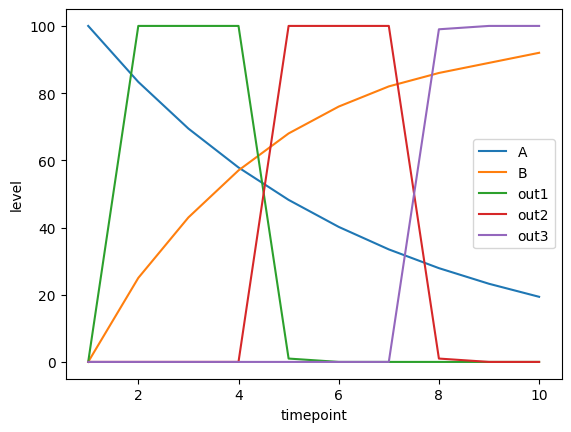

In [8]:
# now let's plot the concentrations
conc_df.plot()
plt.ylabel('level')


initializing: dinkum v0.6.0.dev0


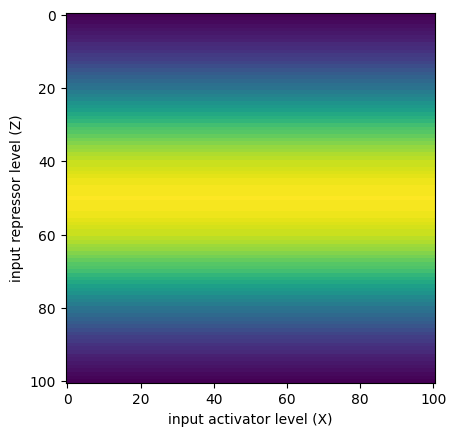

In [9]:
dinkum.reset()

x = Gene(name='X')
z = Gene(name='Z')
o = Gene(name='out')
o2 = Gene(name='out2')

m = Tissue(name='M')
x.is_present(where=m, start=1)

# @CTB note: check parameters, etc.
#z.custom2(GeneTimecourse(start_time=1, tissue=m, values=[20, 40, 60, 80, 100], normalize=False))

logit = vfg2.LogisticRepressor2(activator_name='X', repressor_name='X')
o.custom2(logit)

arr = vfg2.calc_response_2d(timepoint=2, target_gene_name='out', x_gene_name='X', y_gene_name='X')

plt.imshow(arr, cmap='viridis', interpolation='nearest')
plt.xlabel('input activator level (X)')
plt.ylabel('input repressor level (Z)')
plt.show()